<a href="https://colab.research.google.com/github/AnaGutson/Organizacion-de-datos/blob/main/Reducci%C3%B3n_de_la_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reducción de la dimensionalidad**

Visualización de datos en una **dimensión menor** ($2D$ o $3D$), **preservando características importantes** de estos como distancias, correlaciones, etc.

- Visualización de datos para **entender su distribución**.
  - Detección de patrones inherentes a simple vista.
- **Reducción del ruido**.
- **Aceleración de los tiempos de entrenamiento** de un modelo.
- Compresión de la información.
- Presentación de resultados a interesados (quienes no siempre conocen de ciencia de datos).


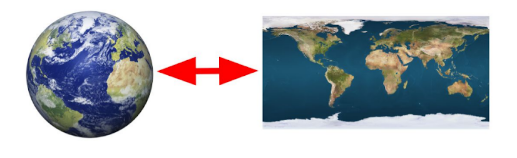

Hay varios **algoritmos** que resuelven este problema, con diversos usos, ventajas y debilidades:
- **PCA**.
- LLE.
- Proyecciones aleatorias.
- **MDS**.
- **t-SNE**.
- LDA.
- UMAP.
- **ISOMAP**.


## **Principal Component Analysis (PCA)**

Sirve para **identificar si hay agrupamiento de datos** en el espacio de entrada. 

Se pueden **identificar correlaciones**, clusters o bien entender cuán dispersos están los datos y sobre todo, sobre qué ejes o variables.

Es **útil** especialmente **cuando no se puede representar el espacio de entrada sobre un eje cartesiano**.


### **Pasos**


- Se calcula el promedio de cada variable.
- Se calcula la intersección de los promedios: el centro espacial de los datos.
- Se centran los datos a partir del nuevo centro espacial.
- Se busca la recta que mejor ajuste que pase por el eje de coordenadas: **PC1**.
- Se calculan las proporciones de cada eje: los **Loading Scores**.
- Se calculan el resto de rectas, teniendo en cuenta que deben:
  - Pasar por el origen.
  - Ser ortogonales a las demás rectas.
  - Tener el mejor ajuste, maximizando su autovector.
- Se calcula la variación de cada componente.
- Si hay componentes que aporten una cantidad significativa de información, se mantienen únicamente esos ejes y se disminuyen las dimensiones.
  Sino, se puede intentar detectar agrupamiento visualmente.
- Se rota el gráfico tal que quede **PC1** horizontal.
- Se utilizan los puntos proyectados en los ejes para reubicar los puntos.



### **Ejemplo (2D)**

Se quiere poder reducir la dimensionalidad del siguiente dataset.

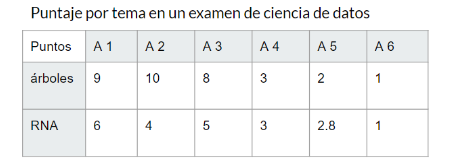

- Se calcula el promedio de la primera variable (árboles): $5.5$.
- Se calcula el promedio de la segunda variable (RNA): $3.63$.
- Se calcula la intersección de los promedios: el **centro espacial** de los datos.

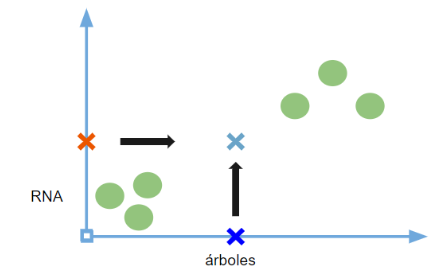

- Se centran los datos a partir del nuevo centro espacial.
- Se traza una línea aleatoria que pasa por el origen de coordenadas.
- Se rota la línea hasta que ajuste bien al conjunto de datos como en regresión lineal (cuadrados mínimos).


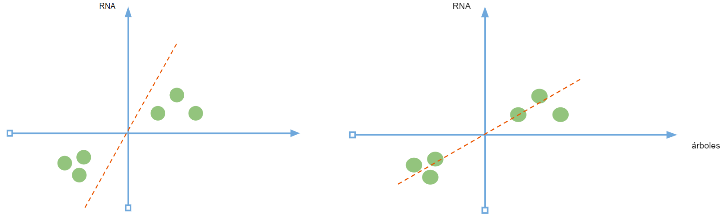

> Para hacer la rotación de la línea:
> - Se busca la proyección ortogonal de cada punto sobre la recta.
>
>  PCA lo que hace es **buscar la recta que mejor ajusta maximizando la suma de las distancias al cuadrado**, medidas desde los puntos proyectados sobre la recta hasta el origen de coordenadas, es decir: $c^2$.


> 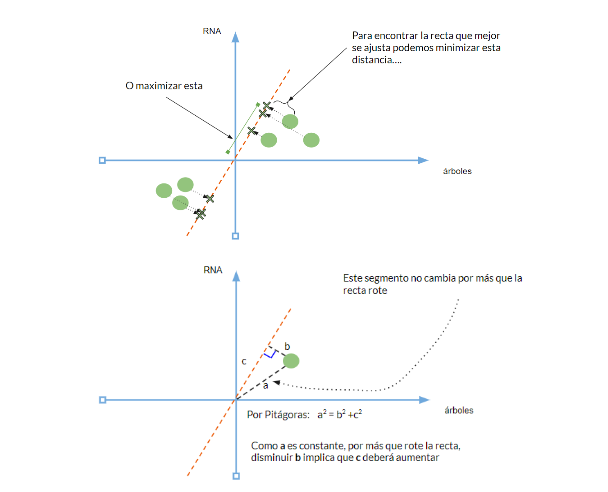

> - Se encuentran todas las distancias (los $c^2$) y se suman: ese es el valor que maximiza PCA.

> 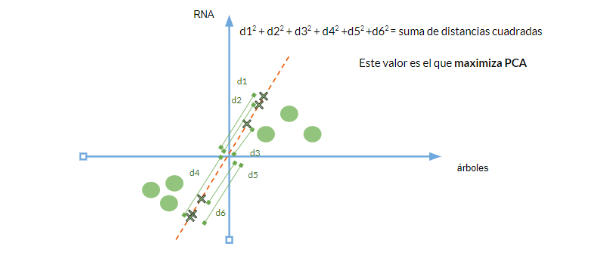

La línea ya rotada se conoce como **componente principal 1 o PC1**.
- Se calcula la pendiente de **PC1**: $4$.
  - Eso quiere decir que los datos están mucho más dispersos sobre el eje $x$ (árboles) que sobre el eje $y$ (RNA).

Como **PC1** es una mezcla de los ejes RNA y árboles (en una relación de $1$ árbol cada $4$ RNA), se la llama: **combinación lineal de variables**.
- Se calcula distancia $a =  4.12$.

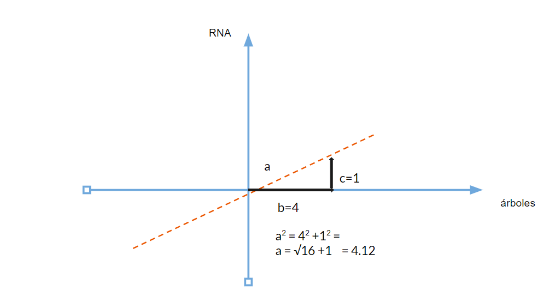

- En general se combina PCA con **SVD** (Singular Value Decomposition), con lo cual se escalan los valores para que $a = 1$.

  Las proporciones de cada eje (RNA y árboles) son llamadas **Loading Scores**.
  - $0.97$ árboles.
  - $0.241$ RNA.


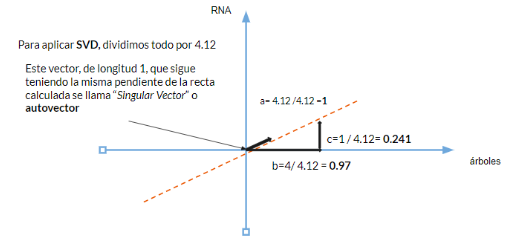

Las distancias al cuadrado que calculamos antes $(d_1^2 + d_2^2 + d_3^2 + d_4^2 + d_5^2 +d_6^2)$ se llaman **autovalores de PC1**.

- Se calcula **PC2: la recta ortogonal a PC1** (que pase por el origen).

  En este caso, como se está trabajando en $R^2$, hay una sola posibilidad.

  Su relación es de $-1$ árboles y $4$ RNA.

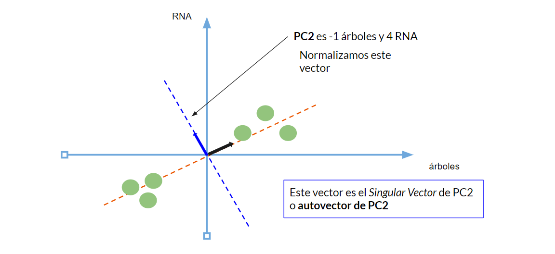

- Para graficar el gráfico final de PCA, se proyecta cada punto sobre las rectas **PC1** y **PC2**.


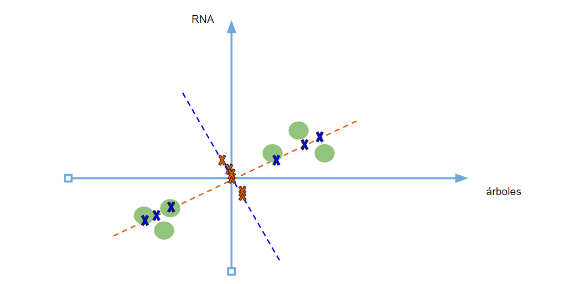

- Se rota el gráfico tal que quede **PC1** horizontal.
- Se utilizan los puntos proyectados en los ejes para reubicar los puntos.


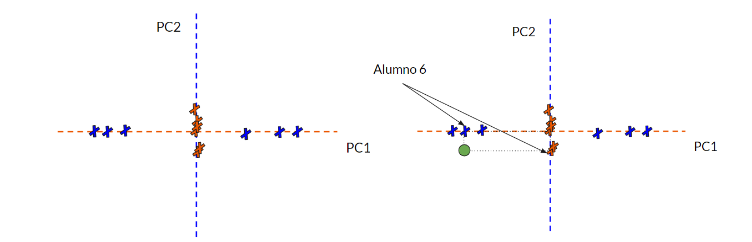

Se recuerda que:

$→$ Suma distancias cuadradas de **PC1** $=$ autovalor de **PC1**.

$→$ Suma distancias cuadradas de **PC2** $=$ autovalor de **PC2**.

- Se calcula la variación de cada componente.
  - $\frac{\textrm{suma distancias cuadradas de PC1}}{n-1} = \textrm{variacion de PC1}$
  - $\frac{\textrm{suma distancias cuadradas de PC2}}{n-1} = \textrm{variacion de PC2}$
- Se calcula la variación relativa de cada componente, es decir, el porcentaje de cada variación.
  Por ejemplo, si $ΔPC1 = 15$ y $ΔPC1 = 3$, entonces la variación de **PC1** es del $\frac{15}{15+3} \cdot 100\% = 83\%$, y de **PC2** es del $\frac{3}{15+3} \cdot 100\% = 17\%$. 

### **Ejemplo (3D)**

Se quiere poder reducir la dimensionalidad del siguiente dataset.

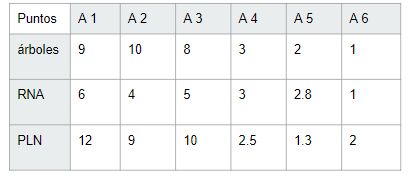

- Se calcula el promedio de la primera variable (árboles): $5.5$.
- Se calcula el promedio de la segunda variable (RNA): $3.63$.
- Se calcula el promedio de la tercera variable (PLN): $6.13$.
- Se calcula la intersección de los promedios: el **centro espacial** de los datos.
- Se centran los datos a partir del nuevo centro espacial.
- Se busca la recta que mejor ajuste que pase por el eje de coordenadas: **PC1**.

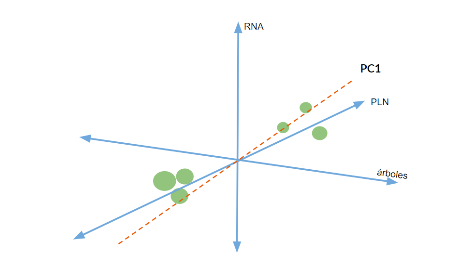

- Se calculan las proporciones de cada eje: los **Loading Scores**.
  - $0.62$ árboles.
  - $0.15$ RNA.
  - $0.77$ PLN.
- Se calcula **PC2**:
  - Pase por el origen.
  - Sea ortogonal a **PC1**.
  - Tenga el mejor ajuste, según se vio, maximizando su autovector.
- Finalmente, se calcula **PC3**:
  - Pase por el origen.
  - Sea ortogonal a **PC1** y **PC2**.


- Se calcula la variación de cada componente.
  - **PC1**: $79\%$.
  - **PC2**: $15\%$.
  - **PC3**: $6\%$.   

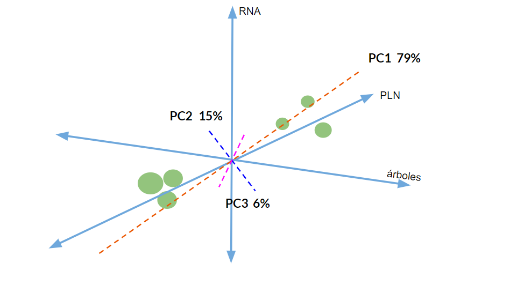

Se observa que los ejes que más dispersión aportan son **PC1** y **PC2**. Se mantienen únicamente esos ejes, dejando de lado **PC3**.

Se convierte en un gráfico de una dimensión menor ($2d$).

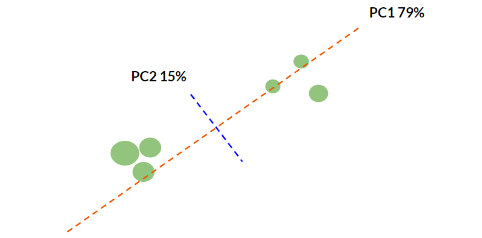

- Se rota el gráfico tal que quede **PC1** horizontal.
- Se utilizan los puntos proyectados en los ejes para reubicar los puntos.


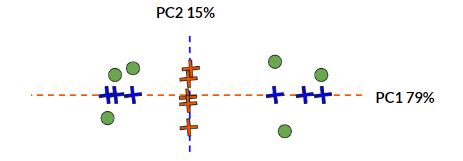

## **Multidimensional Scaling (MDS)**

Tiene dos formas de trabajar:
- "Clásica" o "Métrica".
- "No métrica".

### **Clásica** o **Métrica** - **Principal Coordinate Analysis (PCoA)**

La idea es **preservar las distancias entre puntos**.

Se ubican los puntos en una dimensión menor tal que las distancias se parezcan lo más posible:
$$min_\mathbb Z \left\{\left(\sum_{i \neq j = 1, \dots, n}\left(D(x^{(i)}, x^{(i)}) - D(z^{(i)}- z^{(j)})\right)\right)^2\right\}$$

**Fortalezas**:
- Soporta varios tipos de distancias.
- Permite transformaciones no lineales.

**Debilidades**:
- Optimización iterativa con mínimos locales.
- Difícil determinar que distancia a usar es la mejor.


**Medidas de distancia**:

  


- Manhattan Distance.

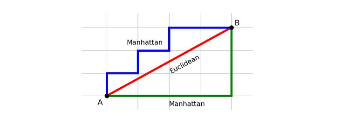

-  Hamming Distance.

  Mide el número mínimo de sustituciones requeridas para cambiar una cadena por otra. ka**rol**in" y "ka**thr**in" tienen distancia $3$.

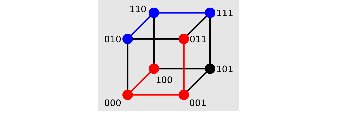

- Great-Circle Distance.

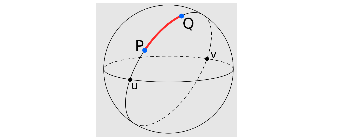

- Mahalanobis Distance.

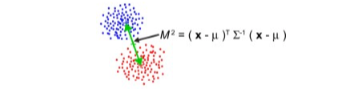

#### **Pasos**

- Se calculan las distancias entre las observaciones:

  Se puede utilizar **cualquier distancia**. Acá se usará la euclidiana.

- Se crea una matriz de distancias.

- Se calculan las distancias para la matriz de distancias, tratando de generar una nueva matriz **M** con la misma cantidad de columnas pero menos filas.

  Es decir, se resuelve un sistema de ecuaciones para que las coordenadas que falten den como resultado las distancias de la matriz.

- Se grafica el resultado: **Mismo gráfico que se obtiene con PCA**.
> Tratar de formar clusters con la técnica de  minimizar las distancias lineales entre los puntos, es exactamente lo mismo que maximizar la correlación lineal. 

#### **Ejemplo**

Se quiere reducir la dimensionalidad del siguiente dataset:

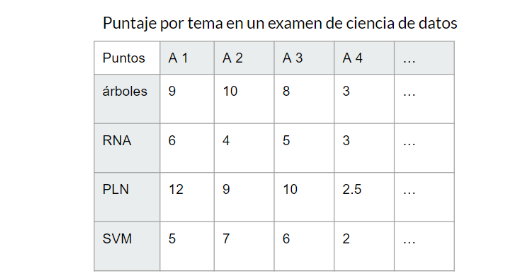

- Se calculan las distancias euclidianas entre las observaciones:
  - $D(A1, A2) = \sqrt{(9-10)^2 + (6-4)^2 + (12-9)^2 + (5-7)^2} = \sqrt{18}$.
  - $D(A1, A3) = \sqrt{(9-8)^2 + (6-5)^2 + (12-10)^2 + (5-6)^2} = \sqrt{7}$.
  - $D(A1, A4) = \sqrt{(9-3)^2 + (6-3)^2 + (12-2.5)^2 + (5-2)^2} = \sqrt{144.25}$.
  - $D(A2, A3) = \sqrt{(10-8)^2 + (4-5)^2 + (9-10)^2 + (7-6)^2} = \sqrt{7}$.
  - $\dots$.

- Se crea una matriz de distancias.

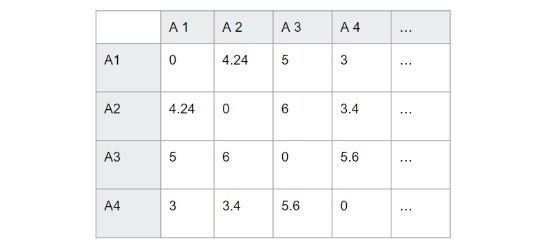

- Se calculan las distancias para la matriz de distancias, tratando de generar una nueva matriz **M** con la misma cantidad de columnas pero menos filas. En este caso se quieren 2 filas solamente:

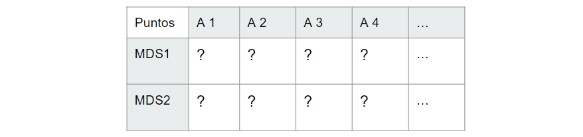

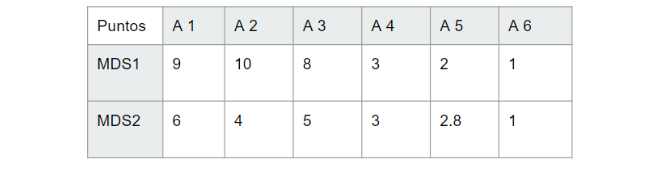

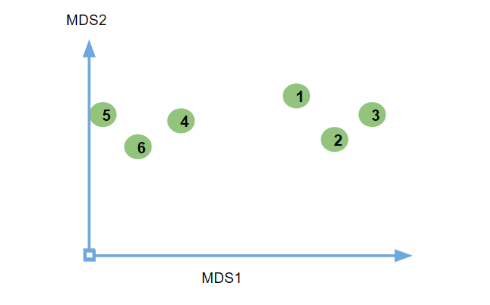

## **T-Distributed Stochastic Neighbor Embedding (t-SNE)**

Desarrollada en $2008$ por **Geoffrey Hinton** y **Laurens Van Der Maaten**.


**Busca preservar los clusters**.

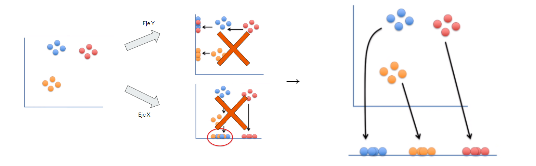

**Fortalezas**:
- De lo mejor para visualizar datos.
- Conserva estructuras no lineales globales y locales.

**Debilidades**:
- Es estocástico (es no determinista).
- Escala mucho en tiempo con dimensiones y puntos.
- No se puede usar para nuevos puntos.


#### **Pasos**

El espacio de menor dimensión puede ser cualquiera que se elija, habitualmente se utiliza un espacio con 2D. 

- Se colocan los puntos en el espacio a generar, en orden aleatorio.
- Se mueve cada punto según dónde se encuentren los otros puntos del mismo cluster.
  
  Para hacer esto:
  - Se determina la similitud de todos los puntos originales.
    - Se toma el primer punto (punto de interés) y se mide la distancia al siguiente punto.
    - Se proyecta sobre una curva Normal (campana de Gauss), centrada en el punto de interés. 
    - Se mide la distancia con todos los puntos.
    - Se proyecta en la misma curva.
>    El ancho de la curva Normal, (su desvío estándar) NO es siempre igual. Depende de la densidad de los datos en la cercanía del punto de interés.
    - Como las curvas no son iguales, se normaliza la similitud:
$$\frac{\textrm{similitud}}{\textrm{suma de todas las similitudes}} = \textrm{similitud escalada} = \textrm{puntaje (score)}.$$
>
> Tiene un parámetro llamado “perplejidad” (perplexity) que es igual a la densidad esperada para un punto. 
>
> La desviación estándar se define por este valor de **perplejidad** que corresponde al número de vecinos alrededor de cada punto. Este valor lo establece el usuario de antemano y permite estimar la desviación estándar de las distribuciones gaussianas definidas para cada punto $x_i$. 
Cuanto mayor es la perplejidad, mayor es la variación.

    - Una vez calculados todos los puntajes de similitud (**similarity scores**), se hace un último ajuste: lo puntajes de similitud de un punto $a$ con otro punto $b$  se promedian, así ambas relaciones son iguales.
    - Se arma una matriz de similitudes.
  - Se calculan las similitudes de los puntos reubicados en el nuevo espacio (que están ordenados aleatoriamente):
    - Para cada punto:
      - Se mide la distancia al siguiente punto.
      - Se proyecta en una curva, centrada en el punto de interés.

        Es una **distribución t-Student**.
        Es un poco más baja en el centro y más alta en los extremos que una distribución Normal. Se usa esta distribución en lugar de la normal ya que permite una mejor visualización de los datos, estos aparecen un poco más “dispersos”.
    - Al igual que antes, se calculan y normalizan todos los nuevos puntajes, y se construye una matriz de similitud. Al ser sobre datos ubicados aleatoriamente, la matriz no está ordenada.
  - Se intenta recrear la matriz original, moviendo cada punto de a pequeños pasos.



#### **Ejemplo**

En este ejemplo se busca un espacio unidimensional.

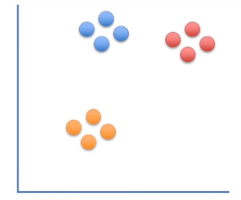

- Se colocan los puntos en una recta, en orden aleatorio.


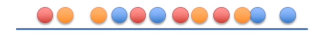

- Se mueven los puntos según la ubicación de los otros puntos del cluster.
  - El primer punto (rojo) se mueve a la derecha.
  - El segundo punto (naranja) se mueve a la derecha.
  - $\dots$

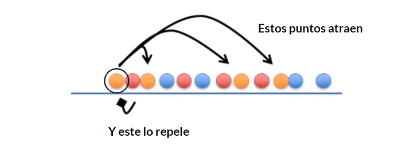

> **Determinar para dónde mover cada punto:**
> - Se determina la similitud de todos los puntos.
>   - Se toma el primer punto (punto de interés) y se mide la distancia al siguiente punto.
>   - Se proyecta sobre una curva Normal (campana de Gauss), centrada en el punto de interés.

> 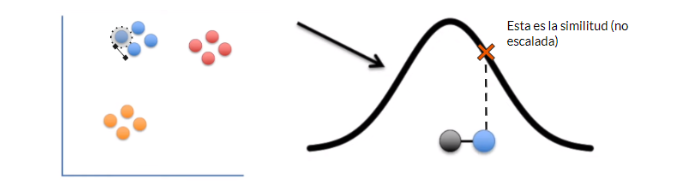

>   - Se mide la distancia con todos los puntos.
>   - Se proyecta en la misma curva.


> 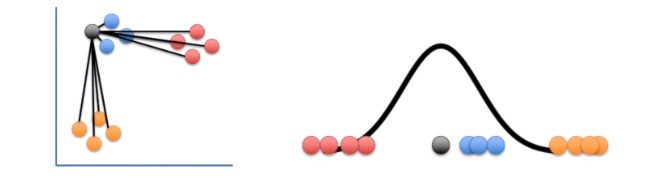

> 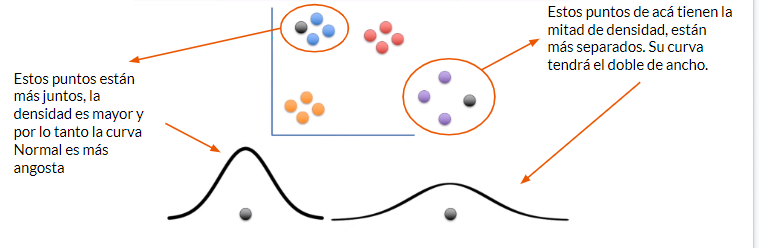

> Como las curvas no son iguales, se normaliza la similitud.
>
> - Una vez calculados todos los puntajes de similitud (**similarity scores**), se hace un último ajuste: los puntajes de similitud de un punto $a$ con otro punto $b$  se promedian, así ambas relaciones son iguales.
>
> - Se arma una matriz de similitudes.

> 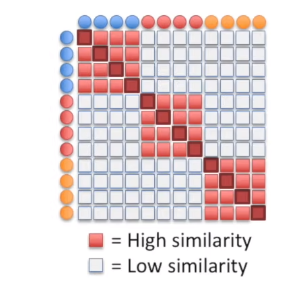

> - Para saber cómo mover un punto, se mide la distancia al siguiente punto.


> 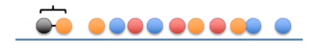

> - Se proyecta en una curva, centrada en el punto de interés.


> 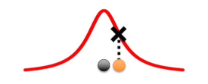

> - Al igual que antes, se calculan y normalizan todos los nuevos puntajes, y se construye una matriz de similitud. Al ser sobre datos ubicados aleatoriamente, la matriz no está ordenada. 

> 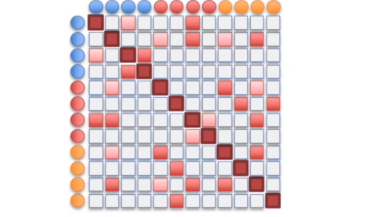

> - Se intenta recrear la matriz original, de a pequeños pasos.

> 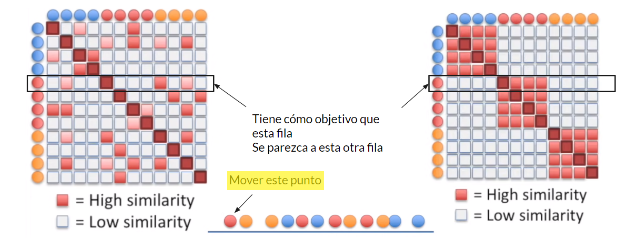

## **ISOMAP**

Algoritmo que permite aproximar la forma de los datos y calcular la distancia Geodésica.

Está pensado para cuando se tiene una **variedad** en el conjunto de entrada.

Una variedad es una porción del espacio, de dimensión $n$ que se parece a $ℝ^n$, en un espacio de dimensión mayor.


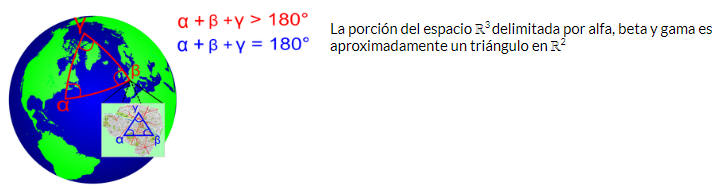

**Hipótesis de variedades.**

Esta hipótesis sostiene que la mayoría de los conjuntos de datos de alta dimensión del mundo real quedan cerca de una variedad con muchas menos dimensiones.

> **Ejemplo**: MNIST tiene datos de entrada en un espacio de $784$ dimensiones ($28\times28$ píxeles). Si se generan imágenes aleatorias, permitiendo total libertad en cada dimensión (cada dimensión puede ir de $0$ a $255$), sólo una fracción increíblemente pequeña podrían ser catalogados de números manuscritos (cercana a cero). Al observarlas, se ve que tienen similitudes: líneas conectadas, centradas, contraste, etc. A la fuerza deben ocupar un subespacio mucho menor que $ℝ^{784}$.

Se utiliza la **distancia geodésica**: se define como la línea de mínima longitud que une dos puntos en una superficie dada, y está contenida en esta superficie. 

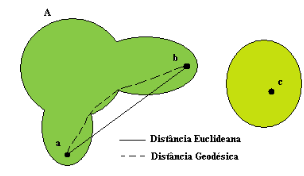

**Problema**: No se sabe, a priori, si los datos siguen una forma particular o no. Y muchos menos se sabe qué forma podría ser esa.


**Debilidades**:

- Es un algoritmo lento, a partir de $1000$ observaciones comienza a notarse la lentitud.
- Puede crear una proyección errónea si $k$ es demasiado grande con respecto a la estructura de la variedad o si hay ruido en los datos, de tal forma que los puntos aparecen ligeramente movidos, fuera de la variedad. Incluso un solo dato mal medido puede alterar muchas entradas en la matriz de distancia geodésica. 
- Si $k$ es demasiado pequeño, el gráfico de vecindad puede volverse demasiado escaso para aproximar las trayectorias geodésicas con precisión. 


#### **Pasos**

- Se construye un grafo pesado.
  - Para cada punto en el espacio de entrada, se toman los $k$ vecinos más cercanos (se usa la distancia Euclidiana para esto).
  Nota: $k$ es un parámetro del método.
  - Se trazan aristas que conectan cada punto con sus vecinos más cercanos y se ponderan esas aristas según la distancia Euclidiana calculada.
- Se construye una matriz de distancias entre todos los puntos.
  - Se usa un algoritmo para encontrar la distancia más corta entre dos nodos en un grafo: **Algoritmo de Dijkstra o de Floyd-Warshall**.
- Se usa MDS según se vio, pero con la matriz de distancia antes calculada.


#### **Ejemplo**

Se quiere aproximar la distancia geodésica de la siguiente figura:

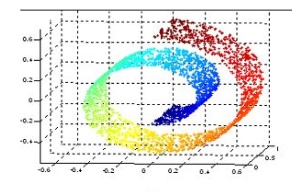

- Se construye un grafo pesado.
  - Para cada punto en el espacio de entrada, se toman los $k$ vecinos más cercanos.
  - Se trazan aristas que conectan cada punto con sus vecinos más cercanos y se ponderan esas aristas según la distancia Euclidiana calculada.


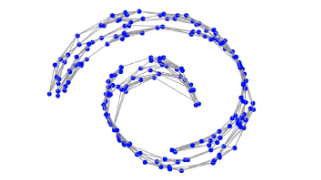

- Se construye una matriz de distancias entre todos los puntos.

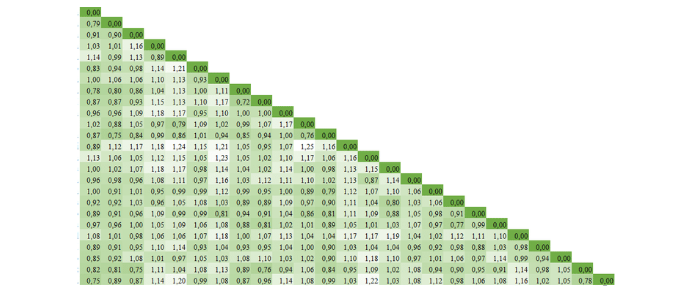

- Se usa MDS según se vio, pero con la matriz de distancia antes calculada.
- Resultado:

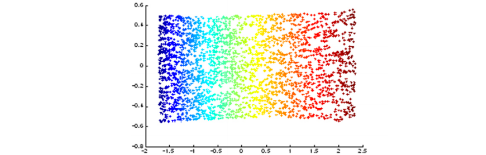

#### **Landmark ISOMAP**

Se tienen $N$ datos especiales, siendo que $N$ es menor que el número total de datos. Solo se toman las distancias que involucran a estos $N$ datos especiales.

Se pueden elegir de forma uniformemente distribuida.

Luego, se aplica Landmark-MDS (LMDS) en la matriz de distancias calculadas para encontrar una proyección euclidiana de todos los puntos en el conjunto original de datos.
